In [3]:
%env QHL_NUMPY=jax

import time
from model import *
from data_loader import *
from layers_init import *
from jax.example_libraries.optimizers import adam, adamax

layer_sizes = [64, 10]

params = init_network_params(layer_sizes, random.PRNGKey(0))
step_size = 0.1
num_epochs = 40
num_it = 1
batch_size = 128
n_targets = 10
kernel_size = 8
kernel_numb = 1
num_quantum = 1
num_conv = 1
kernel = np.random.randn(kernel_numb, kernel_size, kernel_size)
kernel2 = np.random.randn(kernel_numb, int(kernel_size/2), int(kernel_size/2))
my_conv = (kernel, kernel2)
theta = jnp.asarray(0.1*np.random.random((num_quantum, 6)))
theta_small = jnp.asarray(0.1*np.random.random((num_quantum, 5)))
theta14 = jnp.asarray(0.1*np.random.random((num_quantum, 24)))
print(len(theta))
print(len(params))
# params.insert(0, theta_small)
params.insert(0, my_conv)


loss_history = []
loss_history_train = []
loss_history_test = []
train_accuracy = []
test_accuracy = []
step_size = 0
opt_init, opt_state, get_params = adam(1e-5, b1 = 0.9, b2 = 0.999)
opt_state = opt_init(params)

training_generator, train_images, train_labels, test_images, test_labels = data(batch_size, n_targets)
print(train_images.shape)

for epoch in range(num_epochs):
    start_time = time.time()
    for x, y in training_generator:
        for it in range(num_it):
            yy = one_hot(y, n_targets)
            
            loss_res, opt_state = update(opt_state, x, yy, step_size, optimizer = adam(1e-5, b1 = 0.9, b2 = 0.999), theta = theta, conv=)
            loss_history.append(float(loss_res))
            step_size += batch_size

    epoch_time = time.time() - start_time
    params = get_params(opt_state)
    #loss_train = loss(params, train_images, train_labels, theta = None, conv=my_conv)
    loss_test = loss(params, test_images, test_labels, theta = theta, conv=None)
    #loss_history_train.append(float(loss_train))
    loss_history_test.append(float(loss_test))
    train_acc = accuracy(params, train_images, train_labels, theta = theta, conv=None)
    test_acc = accuracy(params, test_images, test_labels, theta = theta, conv=None)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
    print(f"Training set accuracy {format(train_acc)} loss {loss_history[-1]}")
    print("Test set accuracy {}".format(test_acc))
    print(f'theta = {90*params[0]}')
print(f'{theta=}')

env: QHL_NUMPY=jax
1
1
(60000, 8, 8)
Epoch 0 in 26.50 sec
Training set accuracy 0.3581833243370056 loss 9.262746810913086
Test set accuracy 0.3480999767780304
theta = [[7.008102  0.6175205 0.6860762 2.390603  2.3067796 8.498514 ]]
Epoch 1 in 25.20 sec
Training set accuracy 0.3928166627883911 loss 5.654977798461914
Test set accuracy 0.3797999918460846
theta = [[7.0043564  0.53220546 0.5978727  2.5002716  2.4916065  8.403223  ]]
Epoch 2 in 26.71 sec
Training set accuracy 0.40799999237060547 loss 4.760645389556885
Test set accuracy 0.4007999897003174
theta = [[7.0188046  0.48662823 0.56196743 2.5825882  2.5585642  8.313462  ]]
Epoch 3 in 26.45 sec
Training set accuracy 0.41449999809265137 loss 4.196590900421143
Test set accuracy 0.4136999845504761
theta = [[7.0271716  0.46578625 0.5495471  2.662884   2.572294   8.230823  ]]
Epoch 4 in 26.75 sec
Training set accuracy 0.4220833480358124 loss 3.7809202671051025
Test set accuracy 0.42170000076293945
theta = [[7.028725   0.45830593 0.5426057  

In [ ]:
print(max(test_accuracy))
print(max(train_accuracy))
# import time
# from model import *
# from data_loader import *
# from layers_init import *
# from jax.example_libraries.optimizers import adam, adamax

# pic = SV(np.random.rand(1,2,2,2,2,2,2))
# theta = jnp.asarray(90*np.random.random((6)))
# print(theta.shape)
# Param_Shift(Сircuit_9, theta, pic)


In [ ]:
%time
start_time = time.time()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
epoch_time = time.time() - start_time
print(epoch_time)

In [ ]:
train_accuracy

In [ ]:
test_accuracy[-1]

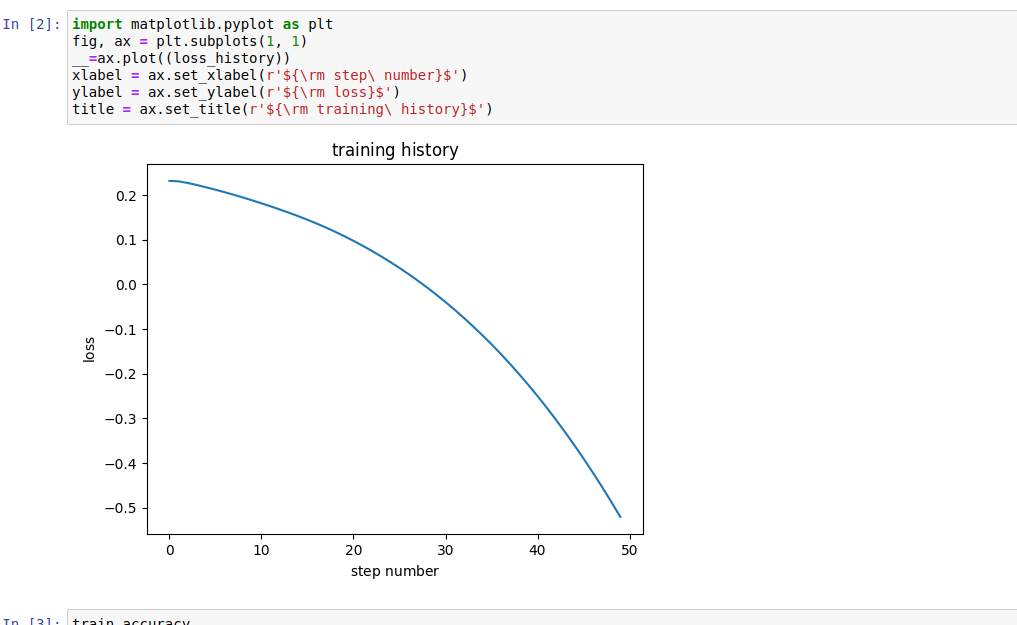
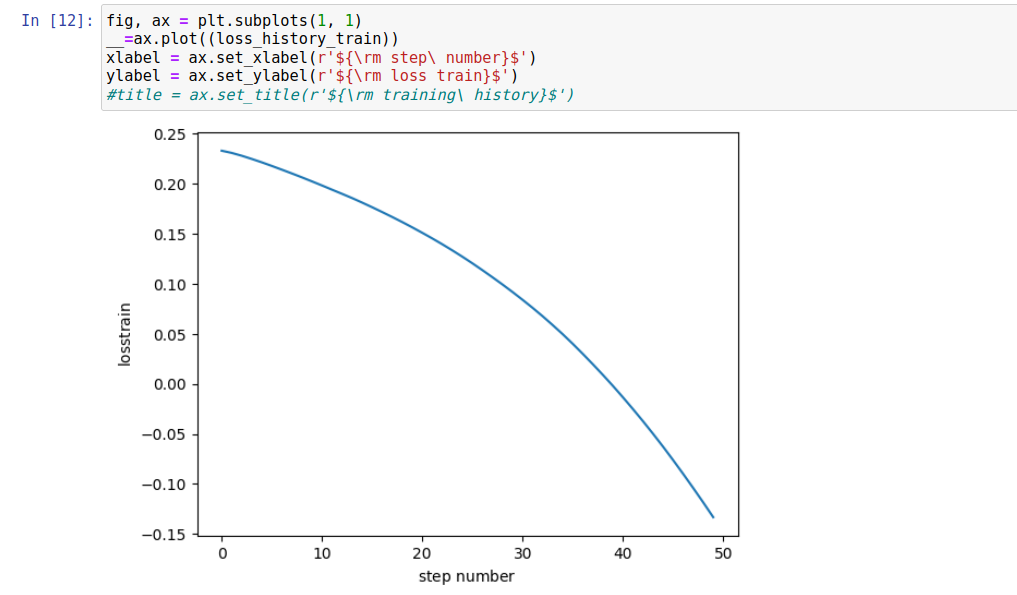
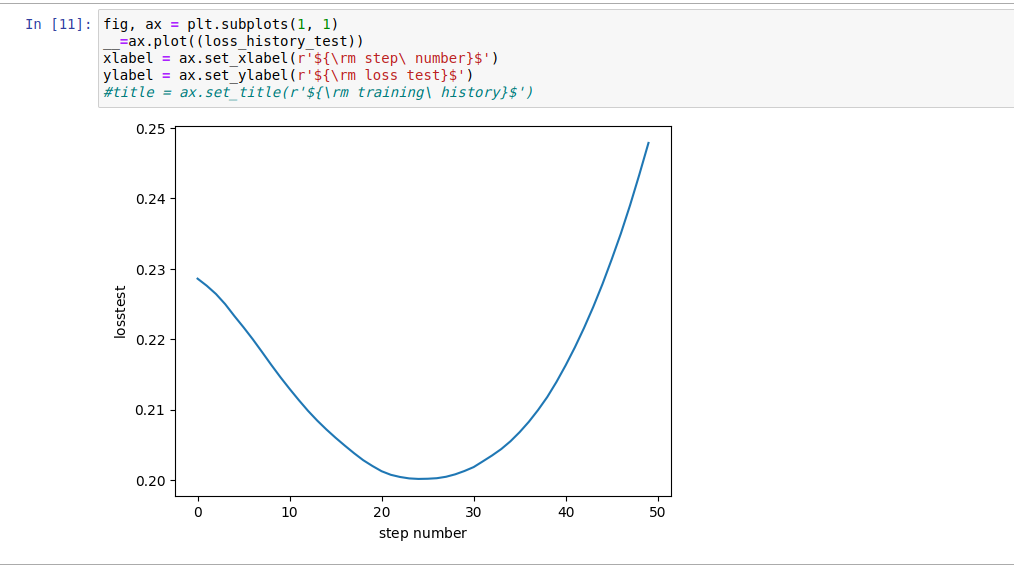
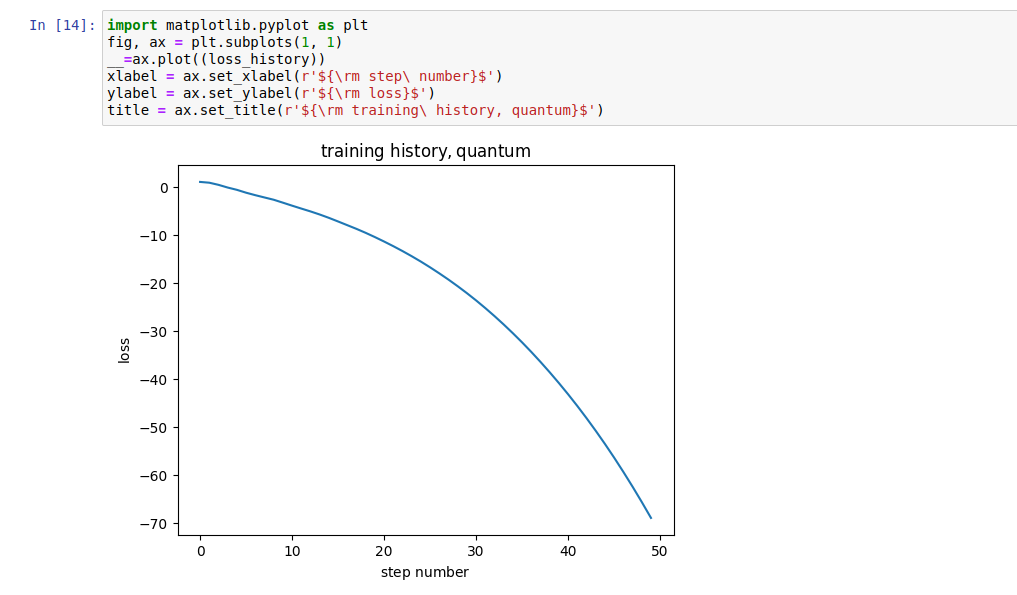
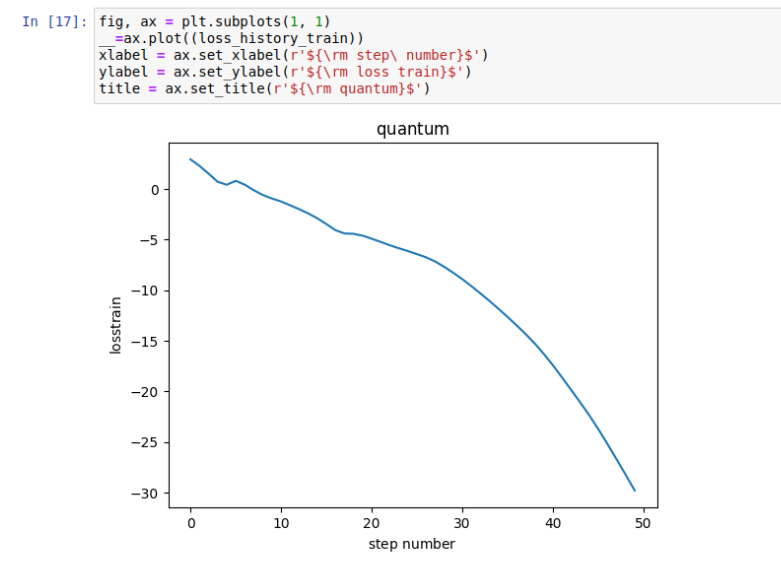
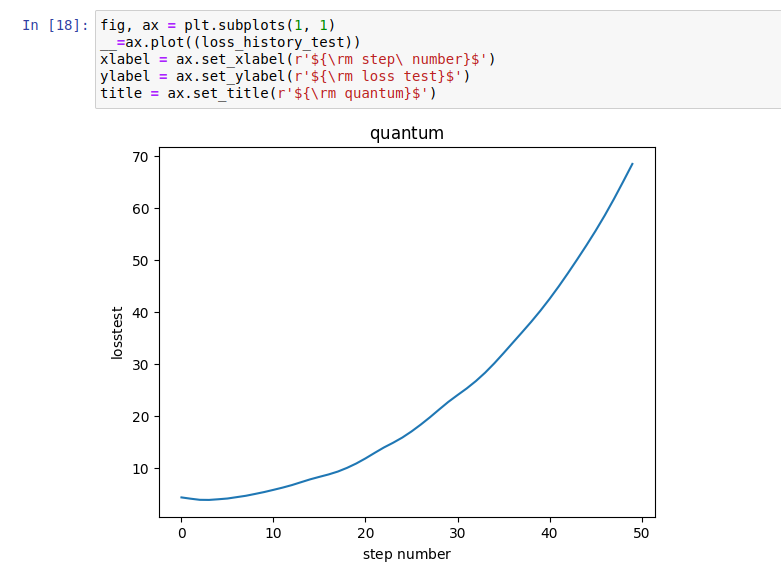

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_train))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss train}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot((loss_history_test))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss test}$')
title = ax.set_title(r'${\rm quantum}$')

In [ ]:
theta = jnp.asarray(90*np.random.random((3,6)), dtype = int)
theta1 = np.random.randint(90, size=(1, 6))
print(theta, theta1)

In [ ]:
import jax.numpy as jnp
from qhollab import *
from quantum import *

In [ ]:
num_quantum =1
image = jnp.ones(6)
theta14 = jnp.asarray(0.1*np.random.random((num_quantum, 24)))
circ = Circuit_14(theta14[0])
Pooling_q(circ)

In [ ]:
theta = jnp.asarray(0.1*np.random.random((num_quantum, 8)))
theta_small = jnp.asarray(0.1*np.random.random((num_quantum, 4)))
circ = Сircuit_9(theta[0], img)
circ = Pooling_q(circ)
circ *= Сircuit_9(theta_small[0], img/2)

In [ ]:
img = SV(np.random.rand(1,2,2,2,2,2,2,2,2))
res = simulate(circ, img).data
res.reshape(1,8)

In [ ]:
circ_ = Сircuit_9(theta[0])*Measurement(0)*Measurement(1)*Measurement(2)*Measurement(3)*Measurement(4)*Measurement(5)
res_ = simulate(circ_, img).data

In [ ]:
res_.reshape(8,8)

In [ ]:
circ

In [ ]:
Сircuit_9(theta[0], img)

In [ ]:
len(img.data_shape)


In [ ]:
Сircuit_9(theta_small[0], Pooling_q(img))

In [ ]:
Pooling_q(Сircuit_9(theta[0]))

In [ ]:
a = np.random.rand(234)

In [ ]:
print(f'{a:0.2f}')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
__=ax.plot((a))
xlabel = ax.set_xlabel(r'${\rm step\ number}$')
ylabel = ax.set_ylabel(r'${\rm loss}$')
title = ax.set_title(r'${\rm training\ history, quantum}$')
fig.savefig('test.pdf')